In [1]:
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)
import seaborn as sns

from IPython.display import SVG
from graphviz import Source
from IPython.display import SVG, display
from IPython.display import HTML

## Need to clean first

In [2]:
dataf = pd.read_csv("data/train.csv", index_col=0)
dataf.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [3]:
dataf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Few NULL embarked records won't play any role in prediction

In [4]:
print(dataf.Parch.unique())
print(dataf.Embarked.unique())

[0 1 2 5 3 4 6]
['S' 'C' 'Q' nan]


In [5]:
dataf = dataf[dataf['Embarked'].notna()]
Embarked = lambda x: ord(x)
dataf['Embarked'] = dataf['Embarked'].transform(Embarked)

## Age cleaning. There was a chance to use a prob distribution. Left for simplicity the Median value

In [6]:
ageMedian = dataf["Age"].median()
print(ageMedian)

28.0


In [7]:
dataf['Age'].fillna(ageMedian, inplace=True)

In [8]:
dataf.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

### Leave the rest; Pair or Triple wise only comparison.

In [9]:
sex = lambda x: 0 if x=="male" else 1 
dataf['Sex'] = dataf['Sex'].transform(sex)

dataf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,83
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,67
3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,83
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,83
5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,83


In [10]:
X , Y = dataf.drop(["Name",  "Cabin", "Ticket"], axis = 1), dataf.Survived

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X , Y , test_size=0.33, random_state=42)

In [12]:
X_train1 = X_train[['Age','Sex',"Survived","Fare"]]

In [13]:
X_train1

,Age,Sex,Survived,Fare
PassengerId,,,,
7,54.0,0,0,51.8625
577,34.0,1,1,13.0000
446,4.0,0,1,81.8583
75,32.0,0,1,56.4958
671,40.0,1,1,39.0000
...,...,...,...,...
108,28.0,0,1,7.7750
272,25.0,0,1,0.0000
863,48.0,1,1,25.9292


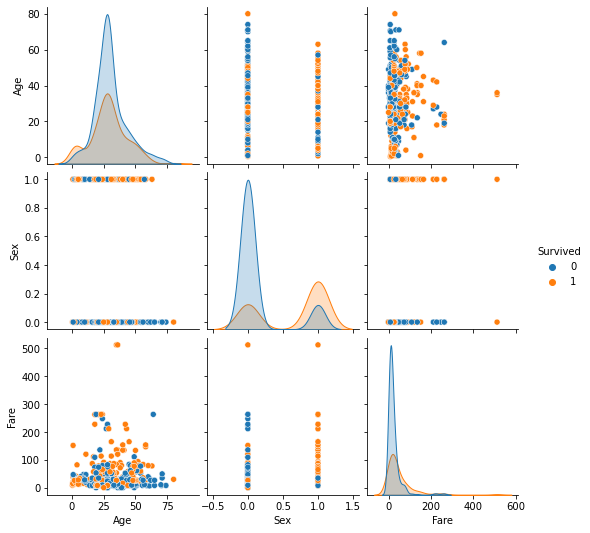

In [14]:
sns.pairplot(X_train1, hue='Survived')